# Classification Metrics

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
%matplotlib inline
plt.style.use('seaborn')

In [2]:
import numpy as np
import sklearn
import matplotlib
import pandas as pd
import sys
libraries = (('Matplotlib', matplotlib), ('Numpy', np), ('Pandas', pd))

print("Python Version:", sys.version, '\n')
for lib in libraries:
    print('{0} Version: {1}'.format(lib[0], lib[1].__version__))

Python Version: 3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)] 

Matplotlib Version: 2.0.2
Numpy Version: 1.12.1
Pandas Version: 0.20.3


In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data
y = iris.target

lr = LogisticRegression()
lr.fit(X,y)
pred = lr.predict(X)

dt = DecisionTreeClassifier(max_depth=1) #purposely picking a less than optimal hyperparameter
dt.fit(X,y)
pred2 = dt.predict(X)

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def accuracy(true, pred):
    true = pandas_to_numpy(true)
    pred = pandas_to_numpy(pred)
    mask = (true == pred)
    numeric_mask = mask.astype(int)
    correct = np.sum(numeric_mask)
    return correct/true.shape[0]

def get_precision_score(cls, true, pred):
    mask = (pred == cls)
    pred_of_cls = pred[mask]
    trues = true[mask]
    prec = accuracy(trues, pred_of_cls)
    return prec
    
def precision(true, pred):
    true = pandas_to_numpy(true)
    pred = pandas_to_numpy(pred)
    unique_pred = np.unique(pred)
    precision_result = {}
    for cls in unique_pred:
        precision_result[cls] = get_precision_score(cls, true, pred)
    return precision_result

def average_precision(true,pred):
    true = pandas_to_numpy(true)
    pred = pandas_to_numpy(pred)
    prec = precision(true,pred)
    
    clses = 0
    pr_score = 0.
    for pr in prec.values():
        clses += 1
        pr_score += pr
    return pr_score/clses

def get_recall_score(cls, true, pred):
    mask = (true == cls)
    pred_of_cls = pred[mask]
    trues = true[mask]
    reca = accuracy(trues, pred_of_cls)
    return reca
    
def recall(true, pred):
    true = pandas_to_numpy(true)
    pred = pandas_to_numpy(pred)
    unique_true = np.unique(true)
    recall_result = {}
    for cls in unique_true:
        recall_result[cls] = get_recall_score(cls, true, pred)
    return recall_result

def average_recall(true,pred):
    true = pandas_to_numpy(true)
    pred = pandas_to_numpy(pred)
    reca = recall(true,pred)
    
    clses = 0
    rc_score = 0.
    for rc in reca.values():
        clses += 1
        rc_score += rc
    return rc_score/clses

def f1_score(true, pred):
    rec = recall(true,pred)
    prec = precision(true,pred)
    f1 = {}
    for key in rec.keys():
        f1[key] = (2*rec[key]*prec[key])/(rec[key]+prec[key])
    return f1

def average_f1(true,pred):
    f1 = f1_score(true,pred)
    
    clses = 0
    f1_scr = 0.
    for f1 in f1.values():
        clses += 1
        f1_scr += f1
    return f1_scr/clses

def classification_report(true, pred):
    prec = precision(true,pred)
    reca = recall(true,pred)
    f1 = f1_score(true,pred)
    acc = accuracy(true,pred)
    clses = np.unique(true)
    fill_empty_slots(clses, [prec, reca, f1])
    for cls in clses:
        print("--- Label %s ---"%str(cls))
        print("Precision: %.3f"%prec[cls])
        print("Recall: %.3f"%reca[cls])
        print("F1: %.3f\n"%f1[cls])
    print("--- Average ---")
    print("Precision: %.3f"%average_precision(true,pred))
    print("Recall: %.3f"%average_recall(true,pred))
    print("F1: %.3f"%average_f1(true,pred))
    print("Accuracy: %.3f"%accuracy(true,pred))
    
def fill_empty_slots(clses, metrics):
    for metric in metrics:
        for cls in clses:
            if cls not in metric:
                metric[cls] = 0.
            
def confusion_matrix(true,pred):
    true = pandas_to_numpy(true)
    pred = pandas_to_numpy(pred)
    unique_true = np.unique(true)
    
    cm = np.zeros((unique_true.shape[0], unique_true.shape[0]))
    
    for cls in unique_true:
        mask = (true == cls)
        pred_of_cls = pred[mask]
        counts = np.unique(pred_of_cls, return_counts=True)
        for pred_cls, count in zip(*counts):
            cm[cls][pred_cls] = count
    return cm    

def pretty_confusion_matrix(true,pred, show_text=True):
    cm = confusion_matrix(true,pred)
    plt.figure(dpi=250)
    plt.imshow(cm, cmap=plt.cm.RdBu)
    plt.grid(False)
    plt.colorbar()
    ax = plt.gca()
    if show_text:
        for (j,i),label in np.ndenumerate(cm):
            ax.text(i,j,label,ha='center',va='center', fontsize=20, color='w')
    plt.xticks(list(range(cm.shape[0])))
    plt.yticks(list(range(cm.shape[1])));
    plt.xlabel("True")
    plt.ylabel("Predicted");
    plt.show();
    return cm
    
def pandas_to_numpy(x):
    """
    Checks if the input is a Dataframe or series, converts to numpy matrix for
    calculation purposes.
    ---
    Input: X (array, dataframe, or series)    
    Output: X (array)
    """
    if type(x) == type(pd.DataFrame()) or type(x) == type(pd.Series()):
        return x.as_matrix()
    if type(x) == type(np.array([1,2])):
        return x
    return np.array(x)

In [39]:
average_precision(y,pred)

0.96188942565754154

In [40]:
average_recall(y,pred)

0.95999999999999996

In [44]:
average_f1(y,pred)

0.95993589743589747

In [58]:
classification_report(y,pred)

--- Label 0 ---
Precision: 1.000
Recall: 1.000
F1: 1.000

--- Label 1 ---
Precision: 0.978
Recall: 0.900
F1: 0.938

--- Label 2 ---
Precision: 0.907
Recall: 0.980
F1: 0.942

--- Average ---
Precision: 0.962
Recall: 0.960
F1: 0.960
Accuracy: 0.960


array([[ 50.,   0.,   0.],
       [  0.,  45.,   5.],
       [  0.,   1.,  49.]])

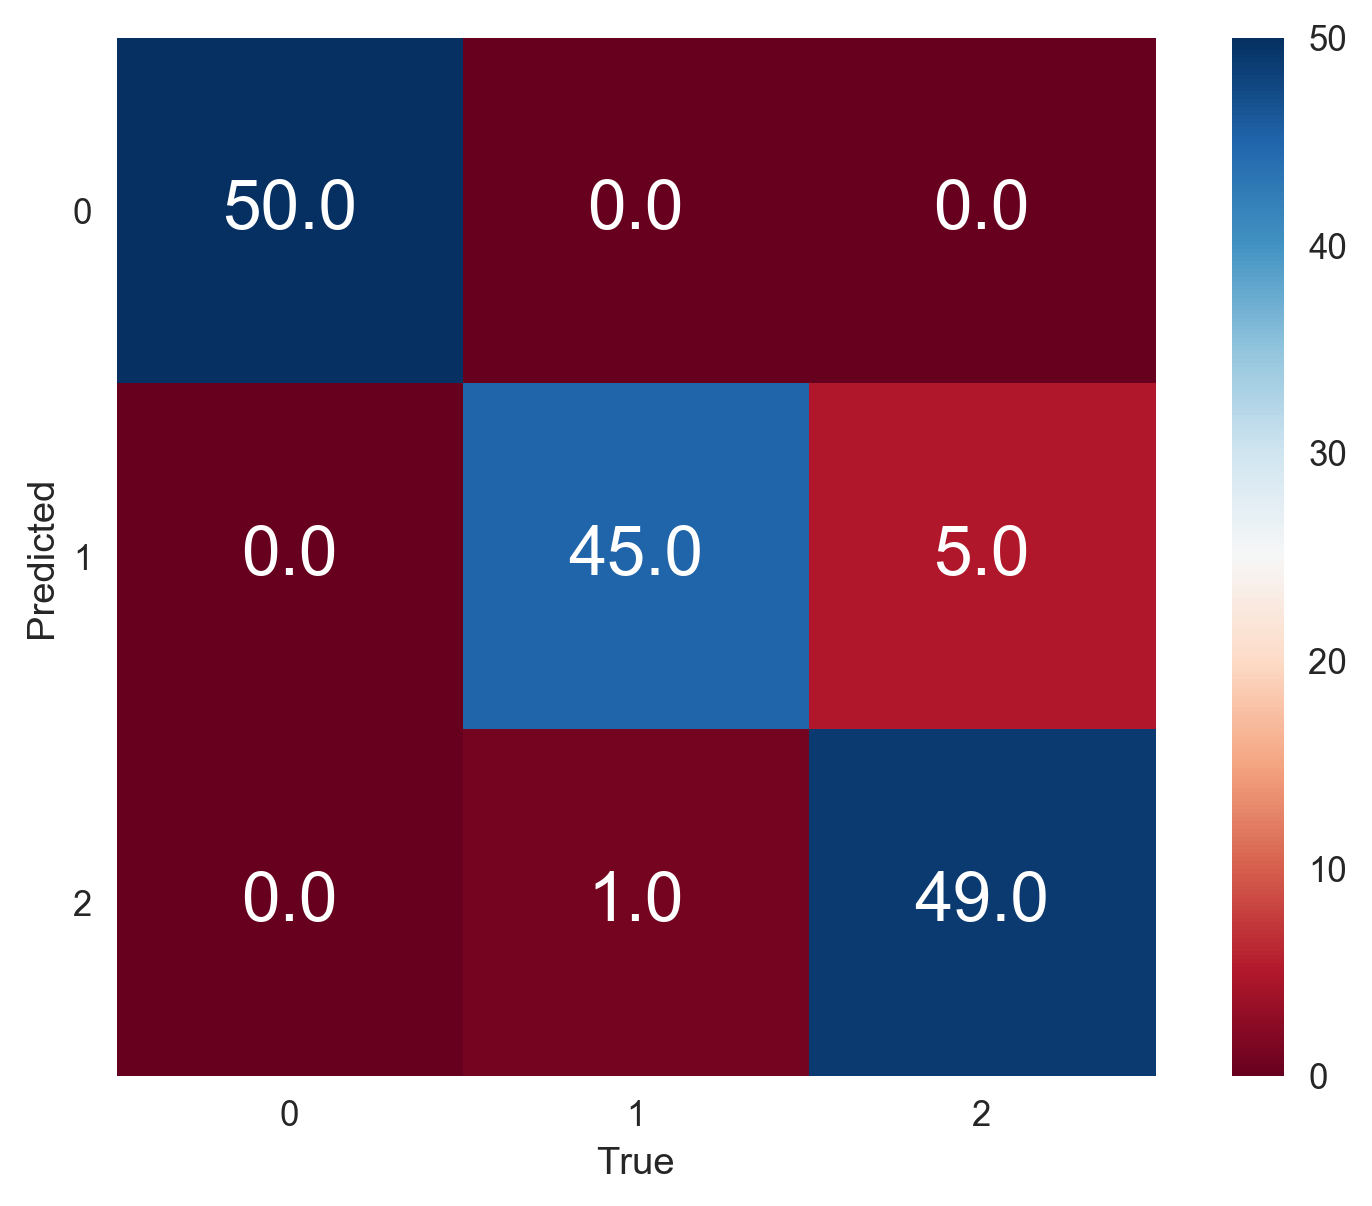

In [83]:
pretty_confusion_matrix(y,pred)